# 3. Markov Chain Monte Carlo

## 3.1 Key Concepts

The Metropolis-Hastings algorithm is a Markov Chain Monte Carlo (MCMC) method for obtaining a sequence of random samples from a probability distribution (target distribution) for which direct sampling is difficult. Since we obtain realisations of a Markov chain, we first give some information on Markov chains in general.

Let $(\Omega,\mathcal{A}, \mathbb{P})$ be some probability space and $\mathcal{H}$ a hilbert space.

**Definition (Markov Chain):** A Markov Chain in $\mathcal{H}$ is a sequence of $\mathcal{H}$-valued random variables $X_j: \Omega \rightarrow \mathcal{H}$ satisfying the Markov property, i.e.,

\begin{equation}
\mathbb{P}(X_{j+1} \in A | X_1,...,X_j) = \mathbb{P}(X_{j+1} \in A | X_j)
\end{equation}

for each $j\in \mathbb{N}$ and $A \in \mathcal{B}(\mathcal{H})$. The state $X_{j+1}$ only depends on the previous state $X_j$.

**Definition (Markov kernel):** We call a map $K: \mathcal{H} \times \mathcal{B}(\mathcal{H}) \rightarrow [0,1]$ transtition or Markov kernel if

* for all $x \in \mathcal{H}$ is $K(x,\cdot)$ a probability measure on $(\mathcal{H},\mathcal{B}(\mathcal{H}))$ and

* for all $A \in \mathcal{B}(\mathcal{H})$ is $K(\cdot, A)$ a measurable functional from $\mathcal{H}$ to $[0,1]$.

For our purpose we focus on finite dimensional $\mathcal{H}= \mathbb{R}^n$. Let $\mu$ be a probability measure on $\mathbb{R}^n$ with density $\mu(dx) \propto p(x) dx$.

**Definition (Proposal kernel):** Let $Q: \mathbb{R}^n \times \mathcal{B}(\mathbb{R}^n) \rightarrow [0,1]$ be a Markov kernel on $\mathbb{R}^n$ with a transition density $q: \mathbb{R}^n \times \mathbb{R}^n \rightarrow [0,\infty)$ such that
\begin{equation}
Q(x,A) = \int_{A} q(x,x')dx'
\end{equation}
for all $A \in \mathcal{B}(\mathbb{R}^n)$. $Q$ is called the proposal kernel.

We can now define the Metropolis-Hastings algortihm which allows us to sample from the target distribution $\mu$.

## Metropolis-Hastings Algorithm

The Metropolis-Hastings algorithm:

**Input** Proposal kernel $Q$ with transition density $q$, initial distribution $\mu \in \mathcal{P}(\mathbb{R}^n)$.

**Output** Realisations $(x_j)_{j \in \mathbb{N}}$ of a Markov chain $(X_j)_{j \in \mathbb{N}}$ 

1. Draw a realisation $x_1 \sim \mu$
2. **for** $j = 1, 2, \ldots$

    -Given the current state $X_j = x_j$, draw a realisation $x' \sim Q(x_j, \cdot)$ (proposal distribution)
    
    -Compute the acceptance probability
    \begin{equation}
    \alpha(x_j, x') := \min \left( 1, \frac{p(x') q(x_j, x')}{p(x_j) q(x', x_j)} \right).
    \end{equation}
    -Draw an independent sample $u_{j+1} \sim \mathcal{U}([0, 1])$ and set
    \begin{equation}
    x_{j+1} = \begin{cases} 
    x' & \text{if } u_{j+1} \leq \alpha(x_j, x'), \\
    x_j & \text{otherwise}.
    \end{cases}
    \end{equation}
3. **end for**

The choice of $\alpha$ guarantees that the Markov Chain $(X_1,..,X_n)$ has $\mu$ as its invariant measure. Since the proof is not relevant for later application, we omit it at this point.

First we note that for the calculation of the acceptance probability $\alpha$ we do not need to know the normalisation constant of the target distribution. Furthermore, the performance of the Metropolis-Hastings algorithm can be significantly influenced by the choice of the proposal distribution. In continuous state spaces, a commonly used proposal distribution is a Gaussian distribution centered on the current state.

### Example: Gaussian Random Walk

Let the proposal kernel $Q: \mathbb{R}^n \times \mathcal{B}(\mathbb{R}^n) \rightarrow [0,1]$ be chosen as follows 
\begin{equation}
Q(s;x,\cdot) = \mathcal{N}(x, s^2\mathbb{1}),
\end{equation}
where $s>0$ is a step size parameter. The transition density $q$ is given by
\begin{equation}
q(s;x,x') \propto exp\left(-\frac{1}{2s^2}\|x'-x\|^2\right)
\end{equation}

This introduces a trade-off in determing the variance parameter $s^2$ of the distribution. If the variance is small, the algorithm will have a high acceptance rate for transitions, but the exploration of the state space will proceed slowly in a manner similar to a random walk, resulting in long correlation times. If the variance parameter is large, the rejection rate will be high. The step size can be optimised or calibrated.

For the programming example we fix the step size for simplicity to $s=1$.

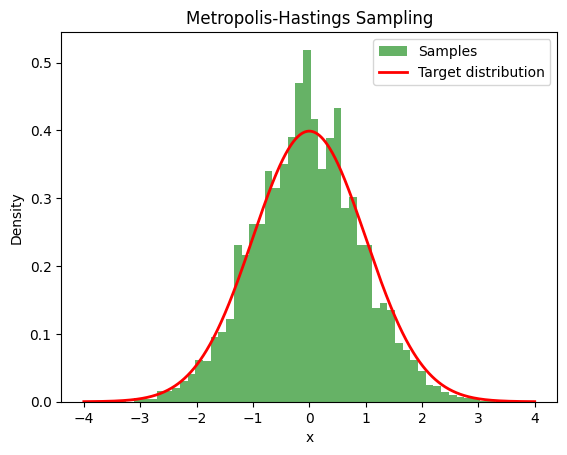

In [1]:
import numpy as np

# Define the target distribution p(x)
def target_distribution(x):
    return np.exp(-0.5 * x**2)  # Standard normal distribution

# Define the proposal distribution Q(x, .)
def proposal_distribution(x):
    return np.random.normal(x, 1.0)  # Normal distribution centered at x with standard deviation 1

# Metropolis-Hastings algorithm
def metropolis_hastings(initial_state, num_samples, target_distribution, proposal_distribution):
    samples = []
    x = initial_state

    for j in range(num_samples):
        # Step 3: Given the current state x_j = x, draw a realization x' from Q(x, .)
        x_prime = proposal_distribution(x)
        
        # Step 4: Compute the acceptance probability α(x, x')
        alpha = min(1, (target_distribution(x_prime) * proposal_distribution(x)) / 
                       (target_distribution(x) * proposal_distribution(x_prime)))
        
        # Step 5: Draw an independent sample u_j+1 ~ uniform[0, 1]
        u = np.random.uniform(0, 1)
        
        # Step 6: Set x_{j+1}
        if u <= alpha:
            x = x_prime

        samples.append(x)

    return np.array(samples)

# Parameters
initial_state = 0.0
num_samples = 10000

# Run Metropolis-Hastings
samples = metropolis_hastings(initial_state, num_samples, target_distribution, proposal_distribution)

# Plot the results
import matplotlib.pyplot as plt

# Plot histogram of samples
plt.hist(samples, bins=50, density=True, alpha=0.6, color='g', label='Samples')
x = np.linspace(-4, 4, 1000)
plt.plot(x, (1/np.sqrt(2*np.pi)) * np.exp(-0.5 * x**2), 'r-', lw=2, label='Target distribution')
plt.title('Metropolis-Hastings Sampling')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.show()

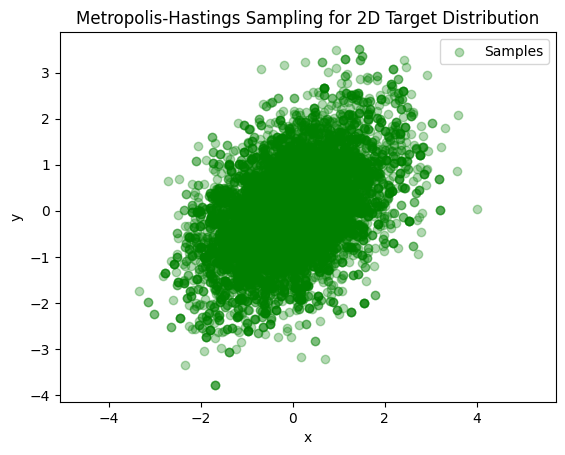

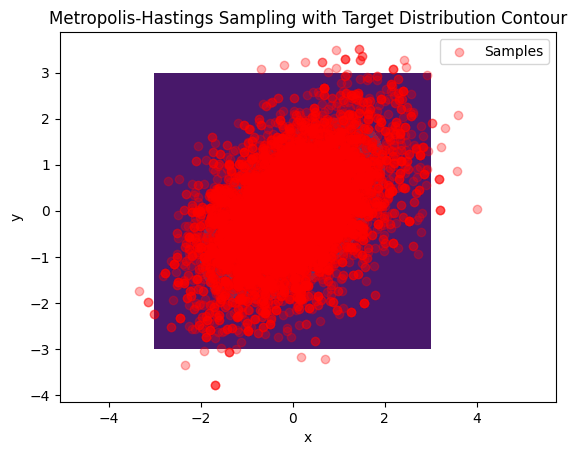

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Define the 2-dimensional target (posterior) distribution p(x)
def target_distribution(x):
    mean = np.array([0, 0])  # Mean of the bivariate normal distribution
    cov = np.array([[1, 0.5], [0.5, 1]])  # Covariance matrix of the bivariate normal distribution
    return multivariate_normal.pdf(x, mean, cov)

# Define the proposal distribution Q(x|y) - Gaussian proposal centered on the current state
def proposal_distribution(x):
    return np.random.multivariate_normal(x, np.eye(2))  # Multivariate normal centered at x with identity covariance

# Metropolis-Hastings algorithm for 2D
def metropolis_hastings_2d(initial_state, num_samples, target_distribution, proposal_distribution):
    samples = []  # List to store the samples
    x = initial_state  # Start from the initial state

    for j in range(num_samples):
        # Given the current state x_j = x, draw a realization x' from Q(x, .)
        x_prime = proposal_distribution(x)
        
        # Compute the acceptance probability α(x, x')
        alpha = min(1, target_distribution(x_prime) / target_distribution(x))
        
        # Draw an independent sample u_j+1 ~ uniform[0, 1]
        u = np.random.uniform(0, 1)
        
        # Set x_{j+1}
        if u <= alpha:
            x = x_prime  # Accept the new state

        samples.append(x)  # Store the current state (whether accepted or not)

    return np.array(samples)

# Parameters
initial_state = np.array([0, 0])
num_samples = 10000

# Run Metropolis-Hastings for 2D target distribution
samples = metropolis_hastings_2d(initial_state, num_samples, target_distribution, proposal_distribution)

# Plot the results
# Plot the samples
plt.scatter(samples[:, 0], samples[:, 1], alpha=0.3, color='g', label='Samples')
plt.title('Metropolis-Hastings Sampling for 2D Target Distribution')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.axis('equal')
plt.show()

# Plot the contour of the target distribution for comparison
x, y = np.mgrid[-3:3:.01, -3:3:.01]
pos = np.dstack((x, y))
rv = multivariate_normal([0, 0], [[1, 0.5], [0.5, 1]])
plt.contourf(x, y, rv.pdf(pos), cmap='viridis')
plt.scatter(samples[:, 0], samples[:, 1], alpha=0.3, color='r', label='Samples')
plt.title('Metropolis-Hastings Sampling with Target Distribution Contour')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.axis('equal')
plt.show()

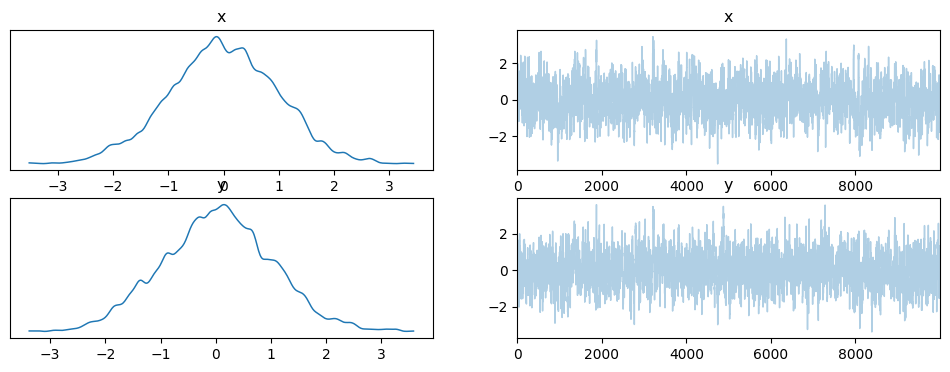

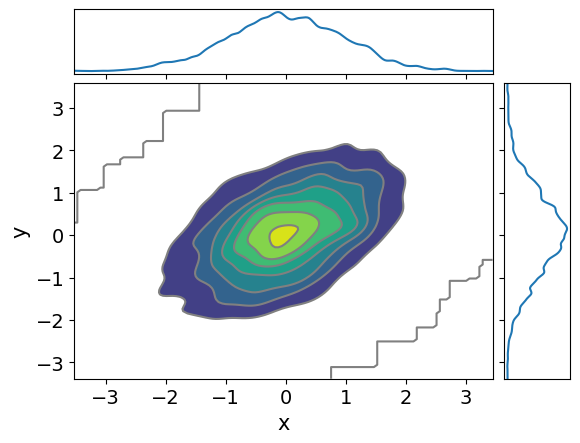

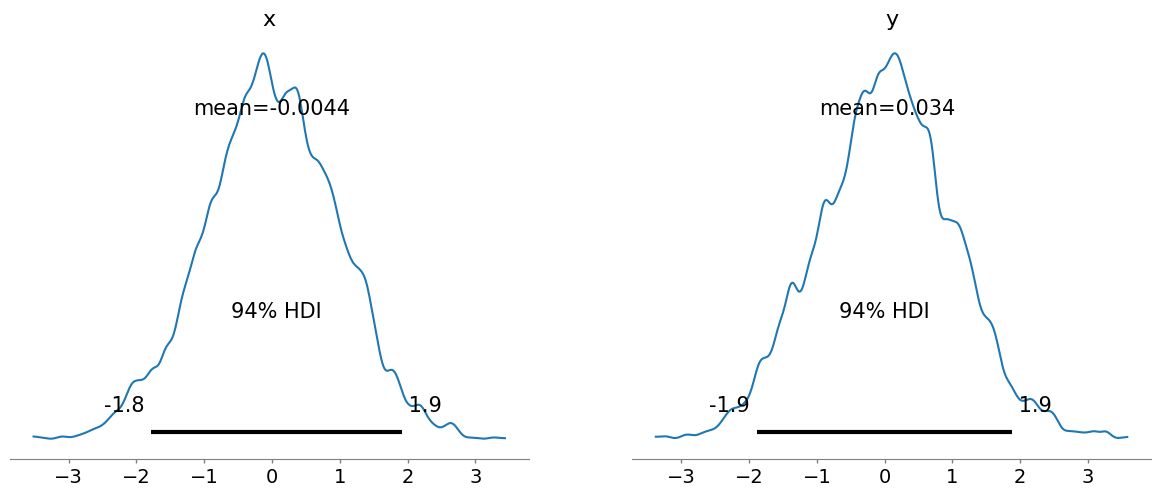

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
import arviz as az

# Define the 2-dimensional target (posterior) distribution p(x)
def target_distribution(x):
    mean = np.array([0, 0])  # Mean of the bivariate normal distribution
    cov = np.array([[1, 0.5], [0.5, 1]])  # Covariance matrix of the bivariate normal distribution
    return multivariate_normal.pdf(x, mean, cov)

# Define the proposal distribution Q(x|y) - Gaussian proposal centered on the current state
def proposal_distribution(x):
    return np.random.multivariate_normal(x, np.eye(2))  # Multivariate normal centered at x with identity covariance

# Metropolis-Hastings algorithm for 2D
def metropolis_hastings_2d(initial_state, num_samples, target_distribution, proposal_distribution):
    samples = []  # List to store the samples
    x = initial_state  # Start from the initial state

    for j in range(num_samples):
        # Given the current state x_j = x, draw a realization x' from Q(x, .)
        x_prime = proposal_distribution(x)
        
        # Compute the acceptance probability α(x, x')
        alpha = min(1, target_distribution(x_prime) / target_distribution(x))
        
        # Draw an independent sample u_j+1 ~ uniform[0, 1]
        u = np.random.uniform(0, 1)
        
        # Set x_{j+1}
        if u <= alpha:
            x = x_prime  # Accept the new state

        samples.append(x)  # Store the current state (whether accepted or not)

    return np.array(samples)

# Parameters
initial_state = np.array([0, 0])
num_samples = 10000

# Run Metropolis-Hastings for 2D target distribution
samples = metropolis_hastings_2d(initial_state, num_samples, target_distribution, proposal_distribution)

# Use ArviZ to create an InferenceData object
az_data = az.from_dict(posterior={'x': samples[:, 0], 'y': samples[:, 1]})

# Plot the results using ArviZ
az.plot_trace(az_data)
plt.show()

# Plot the posterior pairplot using ArviZ
az.plot_pair(az_data, kind='kde', marginals=True)
plt.show()

# Plot the posterior density using ArviZ
az.plot_posterior(az_data)
plt.show()